In [2]:
#importando las librerias
import pandas as pd
import numpy as np

In [6]:
#importando el txt companies
companies = pd.read_csv("companies.txt", sep="\t", encoding="unicode_escape")

#importando el csv rounds2
import codecs
rounds2_file = codecs.open("rounds2.csv", "r", encoding='utf-8', errors='ignore')
rounds2 = pd.read_csv(rounds2_file)

In [7]:
companies['permalink'] = companies['permalink'].apply(lambda x:x.strip().lower().encode('utf-8').decode('ascii', 'ignore'))
companies['name'] = companies['name'].apply(lambda x:str(x).encode('utf-8').decode('ascii', 'ignore'))

In [9]:
#data de companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x:x.strip().lower().encode('utf-8').decode('ascii', 'ignore'))

In [11]:
#data de rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
#buscando compañias unicas en los dos data frames
print("Las compañías únicas en 'companies data' son:", len(companies.permalink.unique()))

print("Las compañías únicas en 'rounds2 data' son:", len(rounds2.company_permalink.unique()))

Las compañías únicas en 'companies data' son: 66368
Las compañías únicas en 'rounds2 data' son: 66368


In [13]:
#para limpiar los datasets, necesitamos hacer un merge de ambos datasets
master_frame = pd.merge(rounds2, companies, how = "left", left_on = "company_permalink", right_on = "permalink")

In [14]:
master_frame.shape

(114949, 16)

In [16]:
#buscando missing values en el dataset
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      1
name                           1
homepage_url                6135
category_list               3411
status                         1
country_code                8679
state_code                 10947
region                     10168
city                       10165
founded_at                 20521
dtype: int64

In [17]:
#calculando el porcentaje de los valores nulos
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.85
city                        8.84
founded_at                 17.85
dtype: float64

In [18]:
#drop de algunas columnas que no son necesarias
master_frame = master_frame.drop(['funding_round_code', 
                                 'funding_round_permalink', 'funded_at', 'permalink', 'homepage_url','state_code', 'region', 'city', 'founded_at', 'status'], axis=1)
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64


In [19]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN


In [20]:
#eliminación de las filas que tienen valor nan en raised_amount
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

#miramos los valores null luego de la anterior eliminación de filas
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
name                  0.00
category_list         1.10
country_code          6.16
dtype: float64

In [22]:
#vemos en el output anterior que para country_code y category_list siguen existiendo valores nan
#reemplazando nan values por unknown - UNK en country_code
master_frame.loc[pd.isnull(master_frame['country_code']),
                ['country_code']] = 'UNK'

#reemplazando nan values por undefined en category_list 
master_frame.loc[pd.isnull(master_frame['category_list']),
                ['category_list']] = "undefined"

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [23]:
#nuestra data ya casi se encuentra limpia para comenzar el análisis

#veamos el tipo de financiación en la columna funding_round_type
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [25]:
#dicha columna solo tiene 4 tipos:
master_frame = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [27]:
#supongamos que la empresa quiere invertir entre 10 y 15 millones de dólares en la empresa. 
#por lo anterior, para encontrar el tipo de fondo adecuado basado en la cantidad en USD se muestra a continuación:

#agruparemos todas estas cuatro financiaciones para obtener el importe total en USD
df_by_funding_type = master_frame.groupby('funding_round_type')
round(df_by_funding_type['raised_amount_usd'].mean(), 5)

funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.198180e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

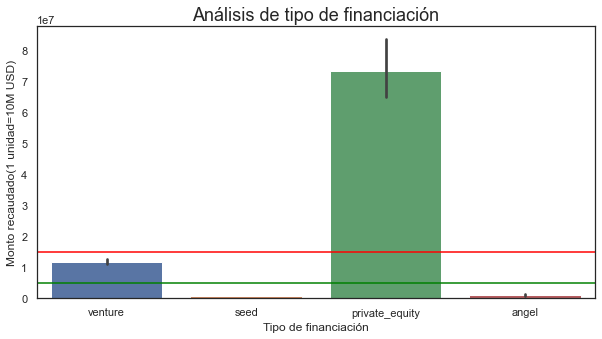

In [31]:
#gráfico de barras basado en el resultado anterior:
#importando las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

# grafico de barras con estadistica por defecto=mean
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
g.set(xlabel='Tipo de financiación',ylabel='Monto recaudado(1 unidad=10M USD)')
g.set_title('Análisis de tipo de financiación',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

In [32]:
#encontraremos los países principales

#Top financiación por país
venture_df = master_frame[master_frame["funding_round_type"]=="venture"]

#la financiación más alta de los nueve países:
venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.225108e+11
CHN    3.983542e+10
UNK    2.550611e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
Name: raised_amount_usd, dtype: float64